### 데이터셋 불러오기

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print("유방암 데이터셋: \n{}".format(cancer.keys()))
print("유방암 데이터의 형태: {}".format(cancer.data.shape))

유방암 데이터셋: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 형태: (569, 30)


유방암 데이터는 30개의 특성을 가지고 있으며 569개의 데이터를 가지고 있습니다.

In [2]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
print("데이터 정보:\n{}".format(cancer.DESCR))

데이터 정보:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean R

### 데이터 전처리

In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(0)

x = cancer.data
y = cancer.target

# x에 대해 최대최소 정규화 실시

scaler = MinMaxScaler()
scaler.fit(x)

x_scaled = scaler.transform(x)

In [5]:
# 정규화 후, 데이터 셋 속성 출력

print('정규화 전 특성별 최소값 : \n', x.min(axis=0))
print('정규화 전 특성별 최소값 : \n', x.max(axis=0))

print('정규화 후 특성별 최소값 : \n', x_scaled.min(axis=0))
print('정규화 후 특성별 최소값 : \n', x_scaled.max(axis=0))

정규화 전 특성별 최소값 : 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
정규화 전 특성별 최소값 : 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
정규화 후 특성별 최소값 : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
정규화 후 특성별 최소값 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

### 딥러닝 모델 제작

In [7]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(Dense(32, input_dim = 30, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(x_train,y_train,epochs=100,batch_size=64,validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 0s 22ms/step - loss: 0.6779 - accuracy: 0.7563 - val_loss: 0.6539 - val_accuracy: 0.8421
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6371 - accuracy: 0.8844 - val_loss: 0.6172 - val_accuracy: 0.8713
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.8894 - val_loss: 0.5867 - val_accuracy: 0.8655
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5709 - accuracy: 0.8794 - val_loss: 0.5551 - val_accuracy: 0.9064
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5401 - accuracy: 0.8920 - val_loss: 0.5237 - val_accuracy: 0.9123
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5080 - accuracy: 0.9020 - val_loss: 0.4905 - val_accuracy: 0.9064
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4762 - accuracy: 0.8920 - val_loss: 0.4584 - val_accuracy: 0.9064
Epoch 8/100
7/7 [=========

In [9]:
smaller = models.Sequential()
smaller.add(Dense(8, input_dim = 30, activation='relu'))
smaller.add(Dense(8, activation='relu'))
smaller.add(Dense(1, activation='sigmoid'))

smaller.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [10]:
smaller_hist = smaller.fit(x_train, y_train,
                                   epochs=100,
                                   batch_size=64,
                                   validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 0s 17ms/step - loss: 0.7308 - accuracy: 0.6256 - val_loss: 0.7126 - val_accuracy: 0.6316
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7112 - accuracy: 0.6256 - val_loss: 0.7003 - val_accuracy: 0.6316
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.6256 - val_loss: 0.6908 - val_accuracy: 0.6316
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.6256 - val_loss: 0.6824 - val_accuracy: 0.6316
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6828 - accuracy: 0.6256 - val_loss: 0.6755 - val_accuracy: 0.6316
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.6256 - val_loss: 0.6692 - val_accuracy: 0.6316
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.6256 - val_loss: 0.6628 - val_accuracy: 0.6316
Epoch 8/100
7/7 [=========

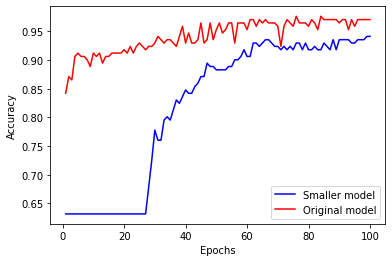

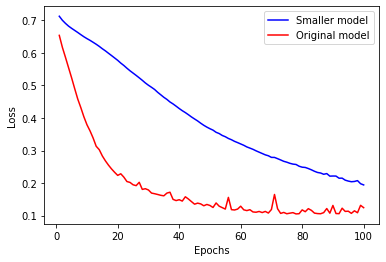

In [11]:
hist_dict = history.history
smaller_dict = smaller_hist.history

val_acc = hist_dict['val_accuracy']
val_loss = hist_dict['val_loss']
smaller_val_acc = smaller_dict['val_accuracy']
smaller_val_loss = smaller_dict['val_loss']

epochs = range(1, len(val_acc)+1)

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, smaller_val_acc, 'b', label='Smaller model')
plt.plot(epochs, val_acc, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, smaller_val_loss, 'b', label='Smaller model')
plt.plot(epochs, val_loss, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
bigger = models.Sequential()
bigger.add(Dense(128, activation='relu', input_dim=30))
bigger.add(Dense(128, activation='relu'))
bigger.add(Dense(1, activation='sigmoid'))

bigger.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [13]:
bigger_hist = bigger.fit(x_train, y_train,
                        epochs=100,
                        batch_size=64,
                        validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 0s 19ms/step - loss: 0.6233 - accuracy: 0.7462 - val_loss: 0.5348 - val_accuracy: 0.8655
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4866 - accuracy: 0.8819 - val_loss: 0.4532 - val_accuracy: 0.8187
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4035 - accuracy: 0.8769 - val_loss: 0.3837 - val_accuracy: 0.8596
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3461 - accuracy: 0.8920 - val_loss: 0.3124 - val_accuracy: 0.9006
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3033 - accuracy: 0.9045 - val_loss: 0.2842 - val_accuracy: 0.9064
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2599 - accuracy: 0.9221 - val_loss: 0.2694 - val_accuracy: 0.9123
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2364 - accuracy: 0.9322 - val_loss: 0.2359 - val_accuracy: 0.9123
Epoch 8/100
7/7 [=========

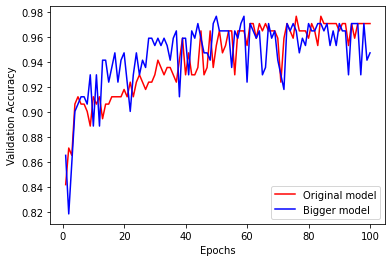

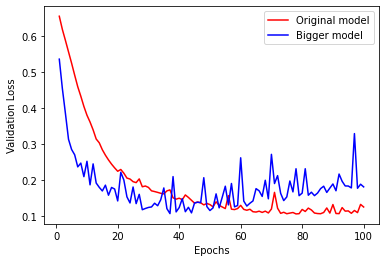

In [14]:
bigger_dict = bigger_hist.history

bigger_val_acc = bigger_dict['val_accuracy']
bigger_val_loss = bigger_dict['val_loss']

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, val_acc, 'r', label='Original model')
plt.plot(epochs, bigger_val_acc, 'b', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, val_loss, 'r', label='Original model')
plt.plot(epochs, bigger_val_loss, 'b', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

### 모델 최적화

#### L1 규제

In [15]:
from tensorflow.keras import regularizers

In [16]:
l1_model = models.Sequential()
l1_model.add(Dense(32, kernel_regularizer=regularizers.l1(0.0001), activation='relu', input_dim=30))
l1_model.add(Dense(32, kernel_regularizer=regularizers.l1(0.0001), activation='relu'))
l1_model.add(Dense(1, activation='sigmoid'))
             
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [17]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=100,
                             batch_size=64,
                             validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 0s 19ms/step - loss: 0.7088 - accuracy: 0.6683 - val_loss: 0.6846 - val_accuracy: 0.7427
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.7789 - val_loss: 0.6521 - val_accuracy: 0.8538
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6390 - accuracy: 0.8442 - val_loss: 0.6190 - val_accuracy: 0.8596
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6068 - accuracy: 0.8442 - val_loss: 0.5882 - val_accuracy: 0.8655
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5755 - accuracy: 0.8719 - val_loss: 0.5605 - val_accuracy: 0.8596
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5457 - accuracy: 0.8618 - val_loss: 0.5397 - val_accuracy: 0.8246
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.8593 - val_loss: 0.5014 - val_accuracy: 0.8830
Epoch 8/100
7/7 [=========

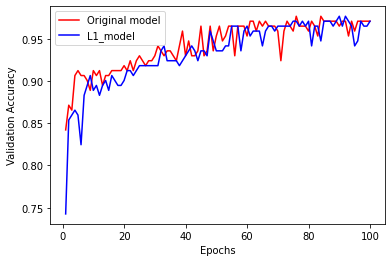

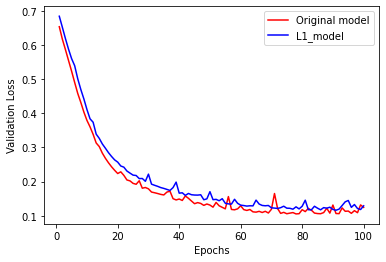

In [18]:
l1_model_dict = l1_model_hist.history

l1_model_val_acc = l1_model_dict['val_accuracy']
l1_model_val_loss = l1_model_dict['val_loss']

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, val_acc, 'r', label='Original model')
plt.plot(epochs, l1_model_val_acc, 'b', label='L1_model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, val_loss, 'r', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'b', label='L1_model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()


#### L2 규제

In [19]:
l2_model = models.Sequential()
l2_model.add(Dense(32, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_dim=30))
l2_model.add(Dense(32, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [20]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=100,
                             batch_size=64,
                             validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 0s 21ms/step - loss: 0.7335 - accuracy: 0.5804 - val_loss: 0.7034 - val_accuracy: 0.8480
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.9070 - val_loss: 0.6654 - val_accuracy: 0.8889
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.9095 - val_loss: 0.6275 - val_accuracy: 0.8947
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6079 - accuracy: 0.9121 - val_loss: 0.5895 - val_accuracy: 0.9064
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5661 - accuracy: 0.9196 - val_loss: 0.5514 - val_accuracy: 0.9006
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5259 - accuracy: 0.9221 - val_loss: 0.5163 - val_accuracy: 0.9064
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4919 - accuracy: 0.9121 - val_loss: 0.4826 - val_accuracy: 0.9064
Epoch 8/100
7/7 [=========

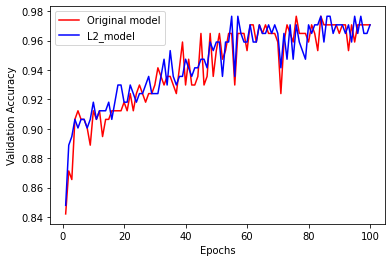

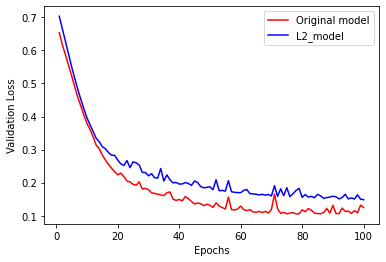

In [21]:
l2_model_dict = l2_model_hist.history

l2_model_val_acc = l2_model_dict['val_accuracy']
l2_model_val_loss = l2_model_dict['val_loss']

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, val_acc, 'r', label='Original model')
plt.plot(epochs, l2_model_val_acc, 'b', label='L2_model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, val_loss, 'r', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'b', label='L2_model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

#### L1_L2 규제

In [22]:
l1_l2_model = models.Sequential()
l1_l2_model.add(Dense(32, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.001),
                          activation='relu', input_dim=30))
l1_l2_model.add(Dense(32, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.001),
                          activation='relu'))
l1_l2_model.add(Dense(1, activation='sigmoid'))

l1_l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [23]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                             epochs=100,
                             batch_size=64,
                             validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 0s 23ms/step - loss: 0.7729 - accuracy: 0.6357 - val_loss: 0.7504 - val_accuracy: 0.6374
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7325 - accuracy: 0.6709 - val_loss: 0.7171 - val_accuracy: 0.7018
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.7739 - val_loss: 0.6854 - val_accuracy: 0.7251
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.7739 - val_loss: 0.6545 - val_accuracy: 0.8772
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6319 - accuracy: 0.8744 - val_loss: 0.6201 - val_accuracy: 0.8596
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6007 - accuracy: 0.8668 - val_loss: 0.5936 - val_accuracy: 0.8889
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.8970 - val_loss: 0.5704 - val_accuracy: 0.8421
Epoch 8/100
7/7 [=========

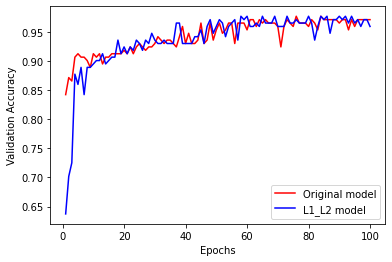

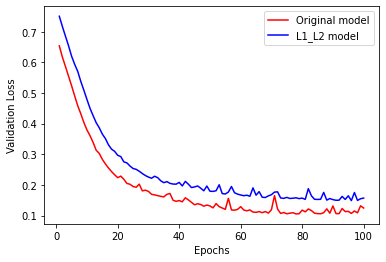

In [24]:
l1_l2_model_dict = l1_l2_model_hist.history

l1_l2_model_val_acc = l1_l2_model_dict['val_accuracy']
l1_l2_model_val_loss = l1_l2_model_dict['val_loss']

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, val_acc, 'r', label='Original model')
plt.plot(epochs, l1_l2_model_val_acc, 'b', label='L1_L2 model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, val_loss, 'r', label='Original model')
plt.plot(epochs, l1_l2_model_val_loss, 'b', label='L1_L2 model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

#### Dropout layer 추가

In [25]:
dpt_model = models.Sequential()
dpt_model.add(Dense(32, activation='relu', input_dim=30))
dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(32, activation='relu'))
dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [26]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                             epochs=100,
                             batch_size=64,
                             validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 0s 18ms/step - loss: 0.7037 - accuracy: 0.4950 - val_loss: 0.6722 - val_accuracy: 0.5088
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5327 - val_loss: 0.6542 - val_accuracy: 0.7778
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.5980 - val_loss: 0.6383 - val_accuracy: 0.8655
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6548 - accuracy: 0.6030 - val_loss: 0.6211 - val_accuracy: 0.8830
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.6608 - val_loss: 0.6030 - val_accuracy: 0.9006
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6107 - accuracy: 0.7286 - val_loss: 0.5831 - val_accuracy: 0.9123
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6095 - accuracy: 0.7538 - val_loss: 0.5673 - val_accuracy: 0.9064
Epoch 8/100
7/7 [=========

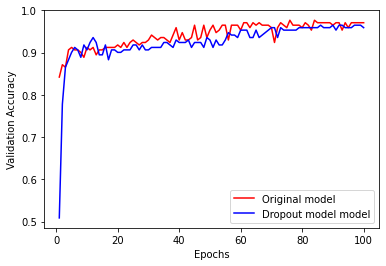

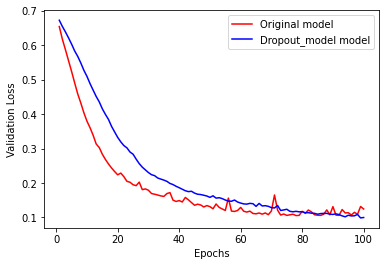

In [27]:
dpt_model_dict = dpt_model_hist.history

dpt_model_val_acc = dpt_model_dict['val_accuracy']
dpt_model_val_loss = dpt_model_dict['val_loss']

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, val_acc, 'r', label='Original model')
plt.plot(epochs, dpt_model_val_acc, 'b', label='Dropout model model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, val_loss, 'r', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'b', label='Dropout_model model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

### 성능평가

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

predict = model.predict_classes(x_test)

print(classification_report(y_test,predict))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        63
           1       0.96      1.00      0.98       108

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [29]:
import matplotlib as mpl
from sklearn import metrics

0.9603174603174603


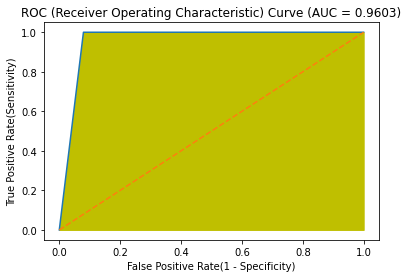

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict) #곡선 그리기

plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, color='y')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

score = metrics.auc(fpr, tpr) #면적 구하기
print(score) #1.0

plt.title('ROC (Receiver Operating Characteristic) Curve (AUC = {})'.format(round(score,4)))
plt.show()